In [1]:
#Work
#請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
#請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
#(optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [15]:

## 
"""
Your code here (optional)
確認硬體資源
"""
#!nvidia-smi

'\nYour code here (optional)\n確認硬體資源\n'

In [16]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [17]:
train, test = keras.datasets.cifar10.load_data()

In [32]:
## 資料前處理
def preproc_min(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_min(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [33]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [34]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024,512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [35]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 3,837,066
Trainable params: 3,837,066
Non-trainable params: 0
_________________________________________________________________


In [36]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [37]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [38]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 27s 539us/step - loss: 1.9660 - acc: 0.2828 - val_loss: 1.7954 - val_acc: 0.3385
Epoch 2/100
50000/50000 [==============================] - 23s 456us/step - loss: 1.7263 - acc: 0.3743 - val_loss: 1.6594 - val_acc: 0.4024
Epoch 3/100
50000/50000 [==============================] - 23s 459us/step - loss: 1.6284 - acc: 0.4163 - val_loss: 1.5806 - val_acc: 0.4386
Epoch 4/100
50000/50000 [==============================] - 23s 460us/step - loss: 1.5494 - acc: 0.4441 - val_loss: 1.5185 - val_acc: 0.4584
Epoch 5/100
50000/50000 [==============================] - 23s 463us/step - loss: 1.5063 - acc: 0.4608 - val_loss: 1.4773 - val_acc: 0.4755
Epoch 6/100
50000/50000 [==============================] - 23s 463us/step - loss: 1.4612 - acc: 0.4756 - val_loss: 1.4559 - val_acc: 0.4905
Epoch 7/100
50000/50000 [==============================] - 23s 461us/step - loss: 1.4207 - acc: 0.4941 - val_l

Epoch 59/100
50000/50000 [==============================] - 23s 455us/step - loss: 0.2801 - acc: 0.9000 - val_loss: 2.8199 - val_acc: 0.5141
Epoch 60/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.2983 - acc: 0.8929 - val_loss: 2.8338 - val_acc: 0.5125
Epoch 61/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.2867 - acc: 0.8991 - val_loss: 2.9219 - val_acc: 0.5179
Epoch 62/100
50000/50000 [==============================] - 23s 451us/step - loss: 0.2720 - acc: 0.9040 - val_loss: 2.9870 - val_acc: 0.5174
Epoch 63/100
50000/50000 [==============================] - 22s 449us/step - loss: 0.2772 - acc: 0.9014 - val_loss: 3.0531 - val_acc: 0.5124
Epoch 64/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.2818 - acc: 0.8998 - val_loss: 2.9711 - val_acc: 0.5137
Epoch 65/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.2652 - acc: 0.9064 - val_loss: 3.0413 - val_acc: 0.5075
Epoch 66/100


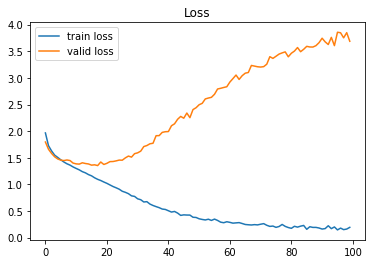

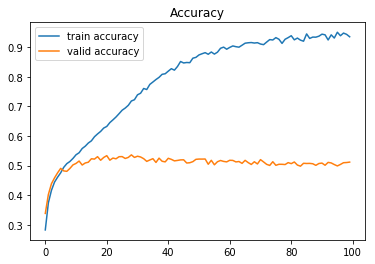

In [40]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()